In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib widget
import pickle

In [2]:
pruning_iterations = 15 # number of sparsification rounds, same as in experimental file
pruning_rate = 0.2 # nr. of remaining weights removed based on pruning schedule each round, same as in experimental file
averaging_iterations = 5 # nr. of total experimental runs, we do multiple for averaging, same as in experiment file

# Define a list of file names containing our experiment result dictionaries
file_names = ['run_1_100.pkl', 'run_4_100.pkl', 'run_17_100.pkl', 'run_19_100.pkl', 'run_42_100.pkl']  
# Create an empty list to store the unpickled results dictionaries
unpickled_results = []

# Loop through each file and unpickle its content
for file_name in file_names:
    with open(file_name, 'rb') as file:
        results = pickle.load(file)
        unpickled_results.append(results)

In [3]:
def concat_results(results_list):
    """
    just a quick function that takes the values from the 5 individual experimental run dictionaries
    and puts them together into one so we can average the values easily
    
    @results_list: the list containing our result dictionaries
    @big_dict: the resulting dictionary that has same keys, but the 5 values of the previous result dicts. in a single key value pair
    """
    # we create another dictionary, that concatenates the values from the 5 result dictionaries into one list using same key
    big_dict = {}
    
    # we need the keys the dictionaries use for storing the result values
    # since all 5 dictionaries have the same keys, we just pick the first
    keys = list(results_list[0].keys())
    
    # now we iteratively use each key, to access the values of the 5 result dictionaries and collect them into the big dictionary
    for key in keys:
        values = [] # the list that will contain the other 5 result lists, for each key
        
        # we go through all 5 result dictionaries and extend our values list by the values of those dictionaries at given key
        values.extend([result[key] for result in results_list])
        
        # assign the concatenated value list to the given key in the big dictionary
        big_dict[key] = values 
    
    return big_dict

In [4]:
# apply our concat_results function to get one dictionary with results from all 5 runs
results_for_averaging = concat_results(unpickled_results)

In [6]:
# We turn the results into numpy arrays and use numpy.average to get the average of 5 runs for every variable 
# Then we do the same for the min and max values of the 5 samples per result
# We get averaged results for the 4 experiment architecture types as well as lower and upper error for errorbar plots
# 1: LeNet-300-100 model pruned with large_final pruning schedule iteratively and retrained
# 2: same as 1, but with weights reset to initial weights WITH pruning mask (no zero value overwrite)
# 3: LeNet-300-100 model pruned with random pruning schedule iteratively and retrained
# 4: same as 3, but with weights reset to initial weights, WITH applied binary mask from pruner

accuracies_avg = np.average(results_for_averaging["accuracies"], axis=0)[0]
accuracies_max = np.max(results_for_averaging["accuracies"], axis=0)[0]
accuracies_min = np.min(results_for_averaging["accuracies"], axis=0)[0]
accuracies = [accuracies_avg,accuracies_avg-accuracies_min,accuracies_max-accuracies_avg] # avg. value, lower and upper error

accuracies_init_avg = np.average(results_for_averaging["accuracies_init"], axis=0)[0]
accuracies_init_max = np.max(results_for_averaging["accuracies_init"], axis=0)[0]
accuracies_init_min = np.min(results_for_averaging["accuracies_init"], axis=0)[0]
accuracies_init = [accuracies_init_avg,accuracies_init_avg-accuracies_init_min,accuracies_init_max-accuracies_init_avg]

accuracies_rand_avg = np.average(results_for_averaging["accuracies_rand"], axis=0)[0]
accuracies_rand_max = np.max(results_for_averaging["accuracies_rand"], axis=0)[0]
accuracies_rand_min = np.min(results_for_averaging["accuracies_rand"], axis=0)[0]
accuracies_rand = [accuracies_rand_avg,accuracies_rand_avg-accuracies_rand_min,accuracies_rand_max-accuracies_rand_avg]

accuracies_rand_init_avg = np.average(results_for_averaging["accuracies_rand_init"], axis=0)[0]
accuracies_rand_init_max = np.max(results_for_averaging["accuracies_rand_init"], axis=0)[0]
accuracies_rand_init_min = np.min(results_for_averaging["accuracies_rand_init"], axis=0)[0]
accuracies_rand_init = [accuracies_rand_init_avg,accuracies_rand_init_avg-accuracies_rand_init_min,accuracies_rand_init_max-accuracies_rand_init_avg]

losses_avg = np.average(results_for_averaging["losses"], axis=0)[0]
losses_max = np.max(results_for_averaging["losses"], axis=0)[0]
losses_min = np.min(results_for_averaging["losses"], axis=0)[0]
losses = [losses_avg,losses_avg-losses_min,losses_max-losses_avg]

losses_init_avg = np.average(results_for_averaging["losses_init"], axis=0)[0]
losses_init_max = np.max(results_for_averaging["losses_init"], axis=0)[0]
losses_init_min = np.min(results_for_averaging["losses_init"], axis=0)[0]
losses_init = [losses_init_avg,losses_init_avg-losses_init_min,losses_init_max-losses_init_avg]

losses_rand_avg = np.average(results_for_averaging["losses_rand"], axis=0)[0]
losses_rand_max = np.max(results_for_averaging["losses_rand"], axis=0)[0]
losses_rand_min = np.min(results_for_averaging["losses_rand"], axis=0)[0]
losses_rand = [losses_rand_avg,losses_rand_avg-losses_rand_min,losses_rand_max-losses_rand_avg]

losses_rand_init_avg = np.average(results_for_averaging["losses_rand_init"], axis=0)[0]
losses_rand_init_max = np.max(results_for_averaging["losses_rand_init"], axis=0)[0]
losses_rand_init_min = np.min(results_for_averaging["losses_rand_init"], axis=0)[0]
losses_rand_init = [losses_rand_init_avg,losses_rand_init_avg-losses_rand_init_min,losses_rand_init_max-losses_rand_init_avg]


MI_estimates_avg = np.average(results_for_averaging["MI_estimates"], axis=0)[0]
MI_estimates_max = np.max(results_for_averaging["MI_estimates"], axis=0)[0]
MI_estimates_min = np.min(results_for_averaging["MI_estimates"], axis=0)[0]
MI_estimates = [MI_estimates_avg,MI_estimates_avg-MI_estimates_min,MI_estimates_max-MI_estimates_avg]

MI_estimates_init_avg = np.average(results_for_averaging["MI_estimates_init"], axis=0)[0]
MI_estimates_init_max = np.max(results_for_averaging["MI_estimates_init"], axis=0)[0]
MI_estimates_init_min = np.min(results_for_averaging["MI_estimates_init"], axis=0)[0]
MI_estimates_init = [MI_estimates_init_avg,MI_estimates_init_avg-MI_estimates_init_min,MI_estimates_init_max-MI_estimates_init_avg]

MI_estimates_rand_avg = np.average(results_for_averaging["MI_estimates_rand"], axis=0)[0]
MI_estimates_rand_max = np.max(results_for_averaging["MI_estimates_rand"], axis=0)[0]
MI_estimates_rand_min = np.min(results_for_averaging["MI_estimates_rand"], axis=0)[0]
MI_estimates_rand = [MI_estimates_rand_avg,MI_estimates_rand_avg-MI_estimates_rand_min,MI_estimates_rand_max-MI_estimates_rand_avg]

MI_estimates_rand_init_avg = np.average(results_for_averaging["MI_estimates_rand_init"], axis=0)[0]
MI_estimates_rand_init_max = np.max(results_for_averaging["MI_estimates_rand_init"], axis=0)[0]
MI_estimates_rand_init_min = np.min(results_for_averaging["MI_estimates_rand_init"], axis=0)[0]
MI_estimates_rand_init = [MI_estimates_rand_init_avg,MI_estimates_rand_init_avg-MI_estimates_rand_init_min,MI_estimates_rand_init_max-MI_estimates_rand_init_avg]


MI_histories_avg = np.average(results_for_averaging["MI_histories"], axis=0)[0]
MI_histories_max = np.max(results_for_averaging["MI_histories"], axis=0)[0]
MI_histories_min = np.min(results_for_averaging["MI_histories"], axis=0)[0]
MI_histories = [MI_histories_avg,MI_histories_avg-MI_histories_min,MI_histories_max-MI_histories_avg]

MI_histories_init_avg = np.average(results_for_averaging["MI_histories_init"], axis=0)[0]
MI_histories_init_max = np.max(results_for_averaging["MI_histories_init"], axis=0)[0]
MI_histories_init_min = np.min(results_for_averaging["MI_histories_init"], axis=0)[0]
MI_histories_init = [MI_histories_init_avg,MI_histories_init_avg-MI_histories_init_min,MI_histories_init_max-MI_histories_init_avg]

MI_histories_rand_avg = np.average(results_for_averaging["MI_histories_rand"], axis=0)[0]
MI_histories_rand_max = np.max(results_for_averaging["MI_histories_rand"], axis=0)[0]
MI_histories_rand_min = np.min(results_for_averaging["MI_histories_rand"], axis=0)[0]
MI_histories_rand = [MI_histories_rand_avg,MI_histories_rand_avg-MI_histories_rand_min,MI_histories_rand_max-MI_histories_rand_avg]

MI_histories_rand_init_avg = np.average(results_for_averaging["MI_histories_rand_init"], axis=0)[0]
MI_histories_rand_init_max = np.max(results_for_averaging["MI_histories_rand_init"], axis=0)[0]
MI_histories_rand_init_min = np.min(results_for_averaging["MI_histories_rand_init"], axis=0)[0]
MI_histories_rand_init = [MI_histories_rand_init_avg,MI_histories_rand_init_avg-MI_histories_rand_init_min,MI_histories_rand_init_max-MI_histories_rand_init_avg]



# We calculate the mutual information neural estimation between input data and output data outside the pruning loop
# this is because both are static and don't change throughout the experiment, we just save compute this way

MI_x_y_avg = np.average(results_for_averaging["MI_x_y"], axis=0)[0]
MI_x_y_max = np.max(results_for_averaging["MI_x_y"], axis=0)[0]
MI_x_y_min = np.min(results_for_averaging["MI_x_y"], axis=0)[0]
MI_x_y = [MI_x_y_avg,MI_x_y_avg-MI_x_y_min,MI_x_y_max-MI_x_y_avg]

MI_history_x_y_avg = np.average(results_for_averaging["MI_history_x_y"], axis=0)[0]
MI_history_x_y_max = np.max(results_for_averaging["MI_history_x_y"], axis=0)[0]
MI_history_x_y_min = np.min(results_for_averaging["MI_history_x_y"], axis=0)[0]
MI_history_x_y = [MI_history_x_y_avg,MI_history_x_y_avg-MI_history_x_y_min,MI_history_x_y_max-MI_history_x_y_avg]

In [7]:
# just a quick function to iteratively determine sparsity level given a certain number of pruning operations with a given rate
def calc_sparsity(iteration, pruning_rate):
    sparsity = 100 * (1 - pruning_rate) ** (iteration+1)
    return 100-sparsity

In [8]:
# We create custom ticks and labels for our graphs showing our mutual information estimations
# ticks are sum of our full mine runs, the fully-connected model with untrained and trained weights followed by the nr. of pruning iterations
# the labels also indicate the untrained fully-connected LeNet MI estimation, then the trained, then followed by the iteratively pruned models
custom_ticks = [i for i in range(pruning_iterations+2)]
# We format the sparsity level to integers, so it looks more readable, can be changed below
custom_labels = ['NT', 'FT'] + [f"{int(calc_sparsity(i, pruning_rate))}" for i in range(pruning_iterations)]

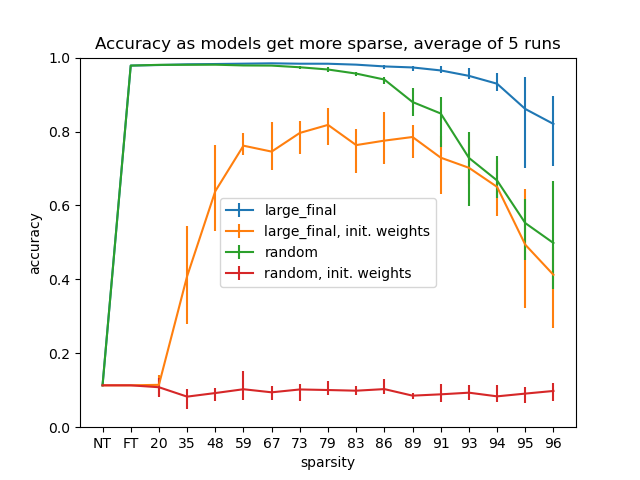

In [10]:
plt.figure()

plt.errorbar(x=custom_ticks, y=accuracies[0], yerr=[accuracies[1], accuracies[2]], label="large_final")
plt.errorbar(x=custom_ticks, y=accuracies_init[0], yerr=[accuracies_init[1], accuracies_init[2]], label="large_final, init. weights")
plt.errorbar(x=custom_ticks, y=accuracies_rand[0], yerr=[accuracies_rand[1], accuracies_rand[2]], label="random")
plt.errorbar(x=custom_ticks, y=accuracies_rand_init[0], yerr=[accuracies_rand_init[1], accuracies_rand_init[2]], label="random, init. weights")

plt.xticks(custom_ticks, custom_labels)
plt.ylim(0, 1)
plt.xlabel('sparsity')
plt.ylabel('accuracy')
plt.title(f'Accuracy as models get more sparse, average of {averaging_iterations} runs')
plt.legend()

# Display the plot
plt.show()


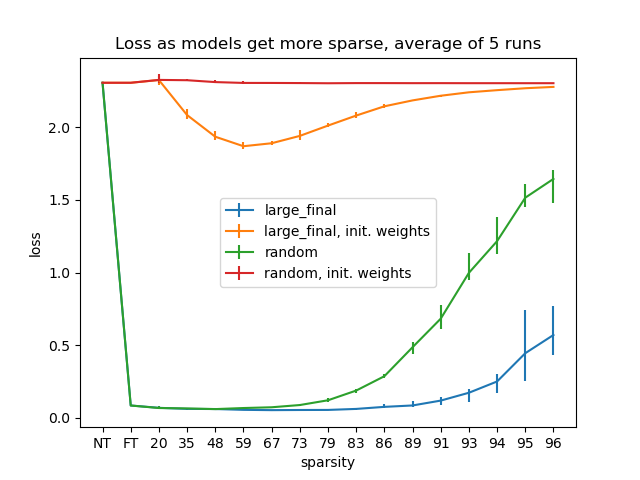

In [11]:
plt.figure()
plt.errorbar(x=custom_ticks, y=losses[0], yerr=[losses[1],losses[2]], label="large_final")
plt.errorbar(x=custom_ticks, y=losses_init[0], yerr=[losses_init[1],losses_init[2]], label="large_final, init. weights")
plt.errorbar(x=custom_ticks, y=losses_rand[0], yerr=[losses_rand[1],losses_rand[2]], label="random")
plt.errorbar(x=custom_ticks, y=losses_rand_init[0], yerr=[losses_rand_init[1],losses_rand_init[2]], label="random, init. weights")
plt.legend()
plt.xticks(custom_ticks,custom_labels)
plt.xlabel('sparsity')
plt.ylabel('loss')
plt.title(f'Loss as models get more sparse, average of {averaging_iterations} runs')

# Display the plot
plt.show()

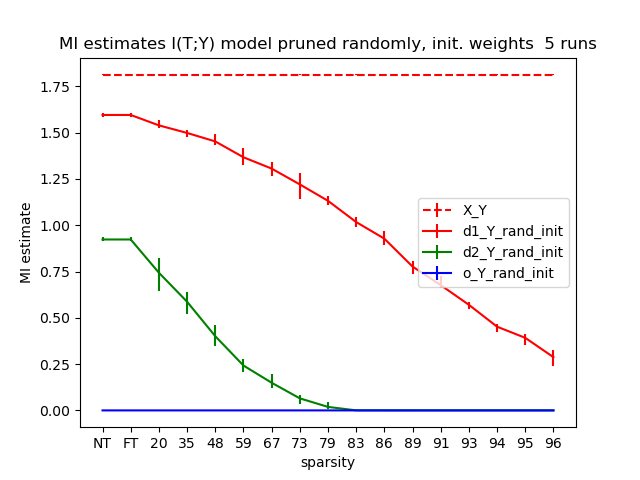

In [12]:
plt.figure()
plt.errorbar(x=custom_ticks, y=[MI_x_y[0]]*len(custom_ticks), yerr=[MI_x_y[1]-MI_x_y[2]], fmt="--", color='r', label='X_Y')
plt.errorbar(x=custom_ticks, y=MI_estimates_rand_init[0][:, 3], yerr=[MI_estimates_rand_init[1][:,3],MI_estimates_rand_init[2][:,3]], color="r", label="d1_Y_rand_init")
plt.errorbar(x=custom_ticks, y=MI_estimates_rand_init[0][:, 4], yerr=[MI_estimates_rand_init[1][:,4],MI_estimates_rand_init[2][:,4]], color="g", label="d2_Y_rand_init")
plt.errorbar(x=custom_ticks, y=MI_estimates_rand_init[0][:, 5], yerr=[MI_estimates_rand_init[1][:,5],MI_estimates_rand_init[2][:,5]], color="b", label="o_Y_rand_init")
plt.legend()
plt.xticks(custom_ticks,custom_labels)
plt.xlabel('sparsity')
plt.ylabel('MI estimate')
plt.title(f'MI estimates I(T;Y) model pruned randomly, init. weights  {averaging_iterations} runs')

# Display the plot
plt.show()

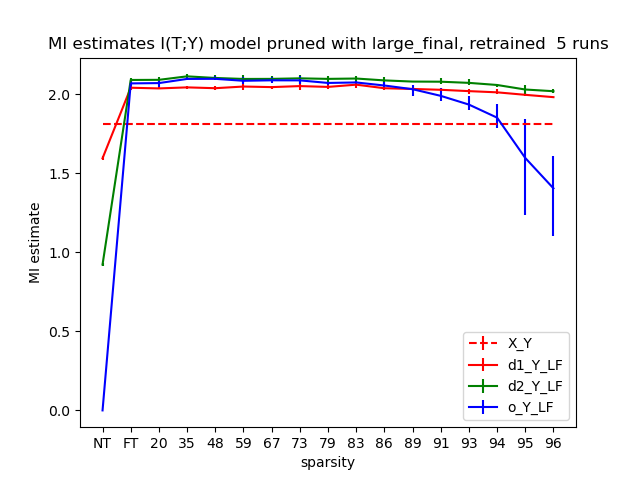

In [13]:
plt.figure()
plt.errorbar(x=custom_ticks, y=[MI_x_y[0]]*len(custom_ticks), yerr=[MI_x_y[1]-MI_x_y[2]], fmt="--", color='r', label='X_Y')
plt.errorbar(x=custom_ticks, y=MI_estimates[0][:, 3], yerr=[MI_estimates[1][:,3],MI_estimates[2][:,3]], color="r", label="d1_Y_LF")
plt.errorbar(x=custom_ticks, y=MI_estimates[0][:, 4], yerr=[MI_estimates[1][:,4],MI_estimates[2][:,4]], color="g", label="d2_Y_LF")
plt.errorbar(x=custom_ticks, y=MI_estimates[0][:, 5], yerr=[MI_estimates[1][:,5],MI_estimates[2][:,5]], color="b", label="o_Y_LF")
plt.legend()
plt.xticks(custom_ticks,custom_labels)
plt.xlabel('sparsity')
plt.ylabel('MI estimate')
plt.title(f'MI estimates I(T;Y) model pruned with large_final, retrained  {averaging_iterations} runs')

# Display the plot
plt.show()

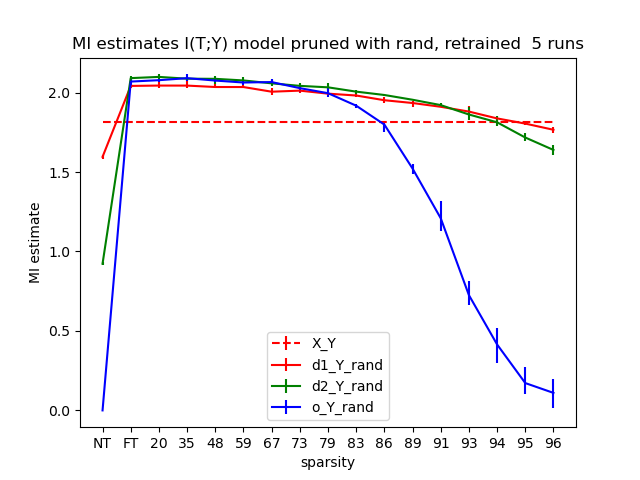

In [14]:
plt.figure()
plt.errorbar(x=custom_ticks, y=[MI_x_y[0]]*len(custom_ticks), yerr=[MI_x_y[1]-MI_x_y[2]], fmt="--", color='r', label='X_Y')
plt.errorbar(x=custom_ticks, y=MI_estimates_rand[0][:, 3], yerr=[MI_estimates_rand[1][:,3],MI_estimates_rand[2][:,3]], color="r", label="d1_Y_rand")
plt.errorbar(x=custom_ticks, y=MI_estimates_rand[0][:, 4], yerr=[MI_estimates_rand[1][:,4],MI_estimates_rand[2][:,4]], color="g", label="d2_Y_rand")
plt.errorbar(x=custom_ticks, y=MI_estimates_rand[0][:, 5], yerr=[MI_estimates_rand[1][:,5],MI_estimates_rand[2][:,5]], color="b", label="o_Y_rand")
plt.legend()
plt.xticks(custom_ticks,custom_labels)
plt.xlabel('sparsity')
plt.ylabel('MI estimate')
plt.title(f'MI estimates I(T;Y) model pruned with rand, retrained  {averaging_iterations} runs')

# Display the plot
plt.show()

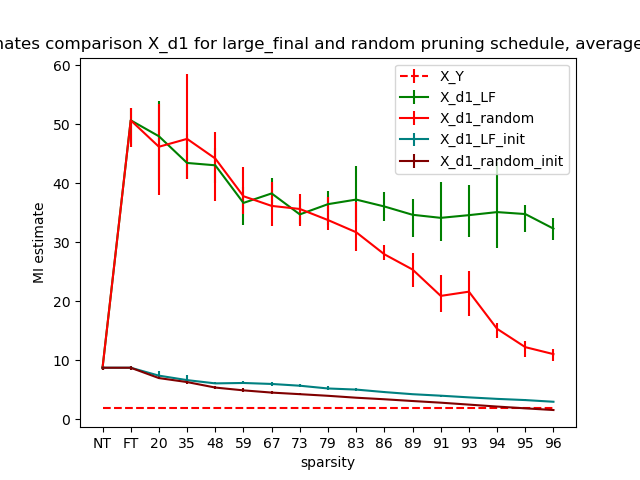

In [15]:
plt.figure()
plt.errorbar(x=custom_ticks, y=[MI_x_y[0]]*len(custom_ticks), yerr=[MI_x_y[1]-MI_x_y[2]], fmt="--", color='r', label='X_Y')
plt.errorbar(x=custom_ticks, y=MI_estimates[0][:, 0], yerr=[MI_estimates[1][:,0],MI_estimates[2][:,0]], color="g", label="X_d1_LF")
plt.errorbar(x=custom_ticks, y=MI_estimates_rand[0][:, 0], yerr=[MI_estimates_rand[1][:,0],MI_estimates_rand[2][:,0]], color="r", label="X_d1_random")
plt.errorbar(x=custom_ticks, y=MI_estimates_init[0][:, 0], yerr=[MI_estimates_init[1][:,0],MI_estimates_init[2][:,0]], color="teal", label="X_d1_LF_init")
plt.errorbar(x=custom_ticks, y=MI_estimates_rand_init[0][:, 0], yerr=[MI_estimates_rand_init[1][:,0],MI_estimates_rand_init[2][:,0]], color="maroon", label="X_d1_random_init")
plt.legend()
plt.xticks(custom_ticks,custom_labels)
plt.xlabel('sparsity')
plt.ylabel('MI estimate')
plt.title(f'MI estimates comparison X_d1 for large_final and random pruning schedule, average of {averaging_iterations} runs')

# Display the plot
plt.show()

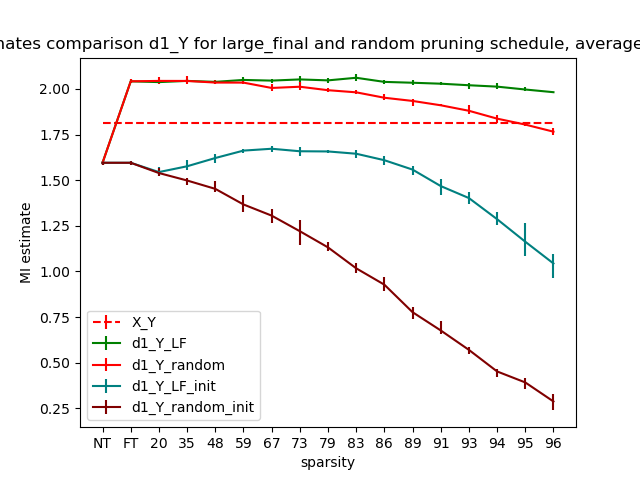

In [16]:
plt.figure()
plt.errorbar(x=custom_ticks, y=[MI_x_y[0]]*len(custom_ticks), yerr=[MI_x_y[1]-MI_x_y[2]], fmt="--", color='r', label='X_Y')
plt.errorbar(x=custom_ticks, y=MI_estimates[0][:, 3], yerr=[MI_estimates[1][:, 3],MI_estimates[2][:, 3]], color="g", label="d1_Y_LF")
plt.errorbar(x=custom_ticks, y=MI_estimates_rand[0][:, 3], yerr=[MI_estimates_rand[1][:, 3],MI_estimates_rand[2][:, 3]], color="r", label="d1_Y_random")
plt.errorbar(x=custom_ticks, y=MI_estimates_init[0][:, 3], yerr=[MI_estimates_init[1][:, 3],MI_estimates_init[2][:, 3]], color="teal", label="d1_Y_LF_init")
plt.errorbar(x=custom_ticks, y=MI_estimates_rand_init[0][:, 3], yerr=[MI_estimates_rand_init[1][:, 3],MI_estimates_rand_init[2][:, 3]], color="maroon", label="d1_Y_random_init")
plt.legend()
plt.xticks(custom_ticks,custom_labels)
plt.xlabel('sparsity')
plt.ylabel('MI estimate')
plt.title(f'MI estimates comparison d1_Y for large_final and random pruning schedule, average of {averaging_iterations} runs')

# Display the plot
plt.show()

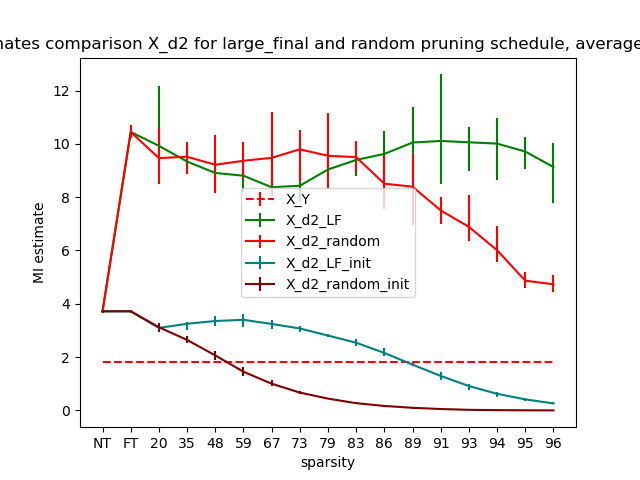

In [17]:
plt.figure()
plt.errorbar(x=custom_ticks, y=[MI_x_y[0]]*len(custom_ticks), yerr=[MI_x_y[1]-MI_x_y[2]], fmt="--", color='r', label='X_Y')
plt.errorbar(x=custom_ticks, y=MI_estimates[0][:, 1], yerr=[MI_estimates[1][:,1],MI_estimates[2][:,1]], color="g", label="X_d2_LF")
plt.errorbar(x=custom_ticks, y=MI_estimates_rand[0][:, 1], yerr=[MI_estimates_rand[1][:,1],MI_estimates_rand[2][:,1]], color="r", label="X_d2_random")
plt.errorbar(x=custom_ticks, y=MI_estimates_init[0][:, 1], yerr=[MI_estimates_init[1][:,1],MI_estimates_init[2][:,1]], color="teal", label="X_d2_LF_init")
plt.errorbar(x=custom_ticks, y=MI_estimates_rand_init[0][:, 1], yerr=[MI_estimates_rand_init[1][:,1],MI_estimates_rand_init[2][:,1]], color="maroon", label="X_d2_random_init")
plt.legend()
plt.xticks(custom_ticks,custom_labels)
plt.xlabel('sparsity')
plt.ylabel('MI estimate')
plt.title(f'MI estimates comparison X_d2 for large_final and random pruning schedule, average of {averaging_iterations} runs')

# Display the plot
plt.show()

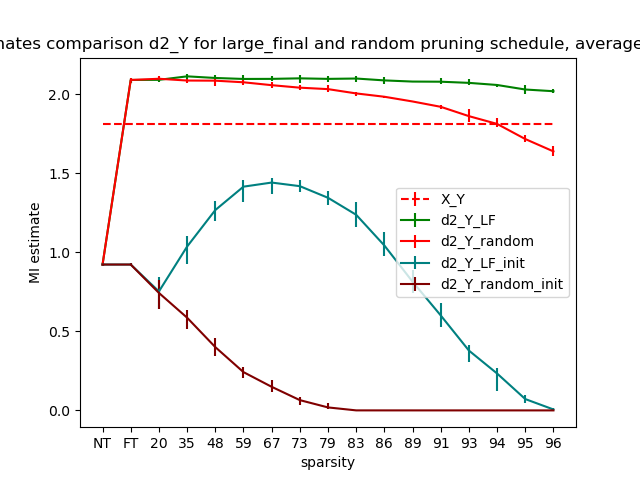

In [18]:
plt.figure()
plt.errorbar(x=custom_ticks, y=[MI_x_y[0]]*len(custom_ticks), yerr=[MI_x_y[1]-MI_x_y[2]], fmt="--", color='r', label='X_Y')
plt.errorbar(x=custom_ticks, y=MI_estimates[0][:, 4], yerr=[MI_estimates[1][:,4],MI_estimates[2][:,4]], color="g", label="d2_Y_LF")
plt.errorbar(x=custom_ticks, y=MI_estimates_rand[0][:, 4], yerr=[MI_estimates_rand[1][:,4],MI_estimates_rand[2][:,4]], color="r", label="d2_Y_random")
plt.errorbar(x=custom_ticks, y=MI_estimates_init[0][:, 4], yerr=[MI_estimates_init[1][:,4],MI_estimates_init[2][:,4]], color="teal", label="d2_Y_LF_init")
plt.errorbar(x=custom_ticks, y=MI_estimates_rand_init[0][:, 4], yerr=[MI_estimates_rand_init[1][:,4],MI_estimates_rand_init[2][:,4]], color="maroon", label="d2_Y_random_init")
plt.legend()
plt.xticks(custom_ticks,custom_labels)
plt.xlabel('sparsity')
plt.ylabel('MI estimate')
plt.title(f'MI estimates comparison d2_Y for large_final and random pruning schedule, average of {averaging_iterations} runs')

# Display the plot
plt.show()

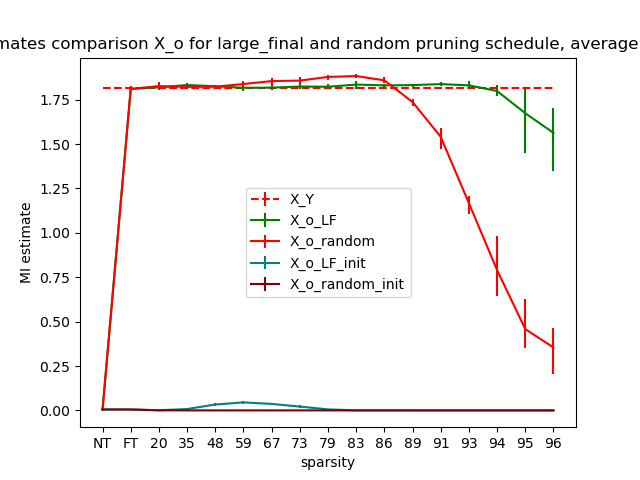

In [19]:
plt.figure()
plt.errorbar(x=custom_ticks, y=[MI_x_y[0]]*len(custom_ticks), yerr=[MI_x_y[1]-MI_x_y[2]], fmt="--", color='r', label='X_Y')
plt.errorbar(x=custom_ticks, y=MI_estimates[0][:, 2], yerr=[MI_estimates[1][:,2],MI_estimates[2][:,2]], color="g", label="X_o_LF")
plt.errorbar(x=custom_ticks, y=MI_estimates_rand[0][:, 2], yerr=[MI_estimates_rand[1][:,2],MI_estimates_rand[2][:,2]], color="r", label="X_o_random")
plt.errorbar(x=custom_ticks, y=MI_estimates_init[0][:, 2], yerr=[MI_estimates_init[1][:,2],MI_estimates_init[2][:,2]], color="teal", label="X_o_LF_init")
plt.errorbar(x=custom_ticks, y=MI_estimates_rand_init[0][:, 2], yerr=[MI_estimates_rand_init[1][:,2],MI_estimates_rand_init[2][:,2]], color="maroon", label="X_o_random_init")
plt.legend()
plt.xticks(custom_ticks,custom_labels)
plt.xlabel('sparsity')
plt.ylabel('MI estimate')
plt.title(f'MI estimates comparison X_o for large_final and random pruning schedule, average of {averaging_iterations} runs')

# Display the plot
plt.show()

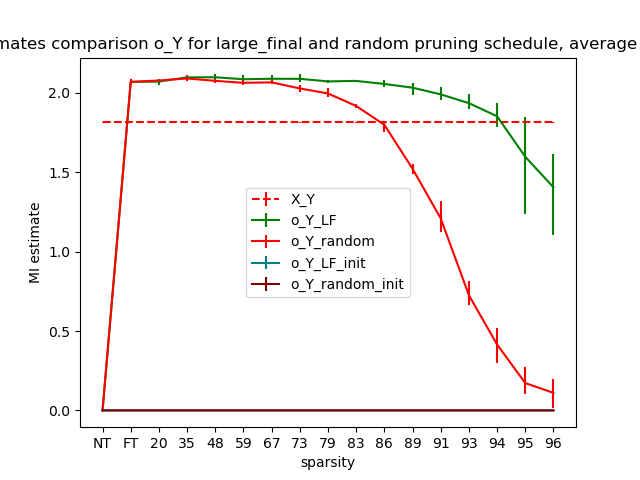

In [20]:
plt.figure()
plt.errorbar(x=custom_ticks, y=[MI_x_y[0]]*len(custom_ticks), yerr=[MI_x_y[1]-MI_x_y[2]], fmt="--", color='r', label='X_Y')
plt.errorbar(x=custom_ticks, y=MI_estimates[0][:, 5], yerr=[MI_estimates[1][:,5],MI_estimates[2][:,5]], color="g", label="o_Y_LF")
plt.errorbar(x=custom_ticks, y=MI_estimates_rand[0][:, 5], yerr=[MI_estimates_rand[1][:,5],MI_estimates_rand[2][:,5]], color="r", label="o_Y_random")
plt.errorbar(x=custom_ticks, y=MI_estimates_init[0][:, 5], yerr=[MI_estimates_init[1][:,5],MI_estimates_init[2][:,5]], color="teal", label="o_Y_LF_init")
plt.errorbar(x=custom_ticks, y=MI_estimates_rand_init[0][:, 5], yerr=[MI_estimates_rand_init[1][:,5],MI_estimates_rand_init[2][:,5]], color="maroon", label="o_Y_random_init")
plt.legend()
plt.xticks(custom_ticks,custom_labels)
plt.xlabel('sparsity')
plt.ylabel('MI estimate')
plt.title(f'MI estimates comparison o_Y for large_final and random pruning schedule, average of {averaging_iterations} runs')

# Display the plot
plt.show()

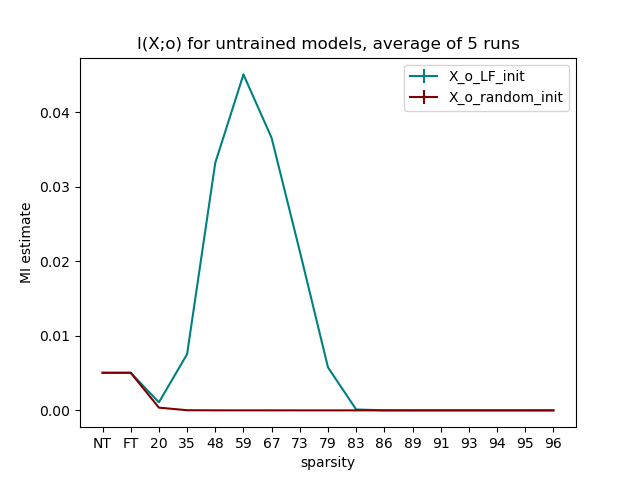

In [21]:
plt.figure()
plt.errorbar(x=custom_ticks, y=MI_estimates_init[0][:, 2], yerr=[MI_estimates_init[1][:,5],MI_estimates_init[2][:,5]], color="teal", label="X_o_LF_init")
plt.errorbar(x=custom_ticks, y=MI_estimates_rand_init[0][:, 2], yerr=[MI_estimates_rand_init[1][:,5],MI_estimates_rand_init[2][:,5]], color="maroon", label="X_o_random_init")
plt.legend()
plt.xticks(custom_ticks,custom_labels)
plt.xlabel('sparsity')
plt.ylabel('MI estimate')
plt.title(f'I(X;o) for untrained models, average of {averaging_iterations} runs')

# Display the plot
plt.show()

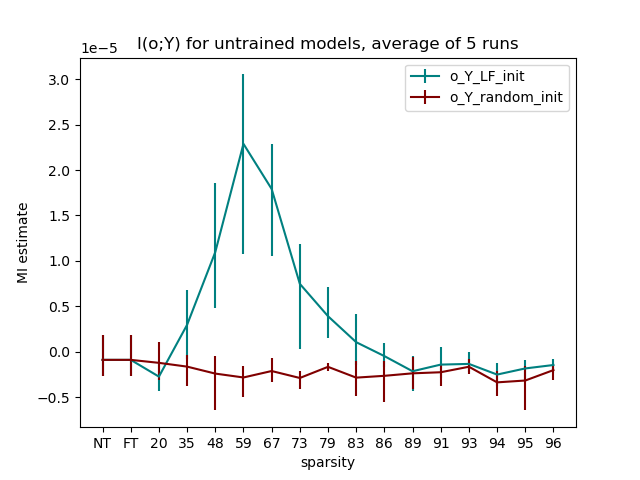

In [22]:
plt.figure()
plt.errorbar(x=custom_ticks, y=MI_estimates_init[0][:, 5], yerr=[MI_estimates_init[1][:,5],MI_estimates_init[2][:,5]], color="teal", label="o_Y_LF_init")
plt.errorbar(x=custom_ticks, y=MI_estimates_rand_init[0][:, 5], yerr=[MI_estimates_rand_init[1][:,5],MI_estimates_rand_init[2][:,5]], color="maroon", label="o_Y_random_init")
plt.legend()
plt.xticks(custom_ticks,custom_labels)
plt.xlabel('sparsity')
plt.ylabel('MI estimate')
plt.title(f'I(o;Y) for untrained models, average of {averaging_iterations} runs')

# Display the plot
plt.show()

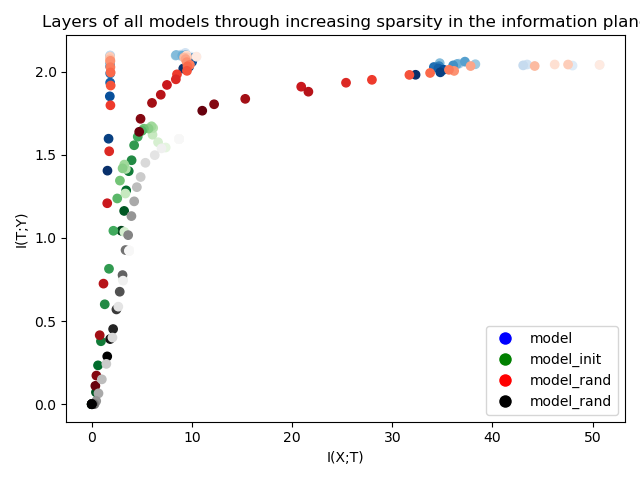

In [23]:
plt.figure()

scatter1 = plt.scatter(MI_estimates[0][:, 0], MI_estimates[0][:, 3], c=custom_ticks, cmap='Blues')
scatter2 = plt.scatter(MI_estimates[0][:, 1], MI_estimates[0][:, 4], c=custom_ticks, cmap='Blues')
scatter3 = plt.scatter(MI_estimates[0][:, 2], MI_estimates[0][:, 5], c=custom_ticks, cmap='Blues')

scatter4 = plt.scatter(MI_estimates_init[0][:, 0], MI_estimates_init[0][:, 3], c=custom_ticks, cmap='Greens')
scatter5 = plt.scatter(MI_estimates_init[0][:, 1], MI_estimates_init[0][:, 4], c=custom_ticks, cmap='Greens')
scatter6 = plt.scatter(MI_estimates_init[0][:, 2], MI_estimates_init[0][:, 5], c=custom_ticks, cmap='Greens')

scatter7 = plt.scatter(MI_estimates_rand[0][:, 0], MI_estimates_rand[0][:, 3], c=custom_ticks, cmap='Reds')
scatter8 = plt.scatter(MI_estimates_rand[0][:, 1], MI_estimates_rand[0][:, 4], c=custom_ticks, cmap='Reds')
scatter9 = plt.scatter(MI_estimates_rand[0][:, 2], MI_estimates_rand[0][:, 5], c=custom_ticks, cmap='Reds')

scatter10 = plt.scatter(MI_estimates_rand_init[0][:, 0], MI_estimates_rand_init[0][:, 3], c=custom_ticks, cmap='Greys')
scatter11 = plt.scatter(MI_estimates_rand_init[0][:, 1], MI_estimates_rand_init[0][:, 4], c=custom_ticks, cmap='Greys')
scatter12 = plt.scatter(MI_estimates_rand_init[0][:, 2], MI_estimates_rand_init[0][:, 5], c=custom_ticks, cmap='Greys')

plt.xlabel('I(X;T)')
plt.ylabel('I(T;Y)')
plt.title('Layers of all models through increasing sparsity in the information plane')

# Create custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label="model"),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label="model_init"),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label="model_rand"),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label="model_rand")]

# Add legend
plt.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

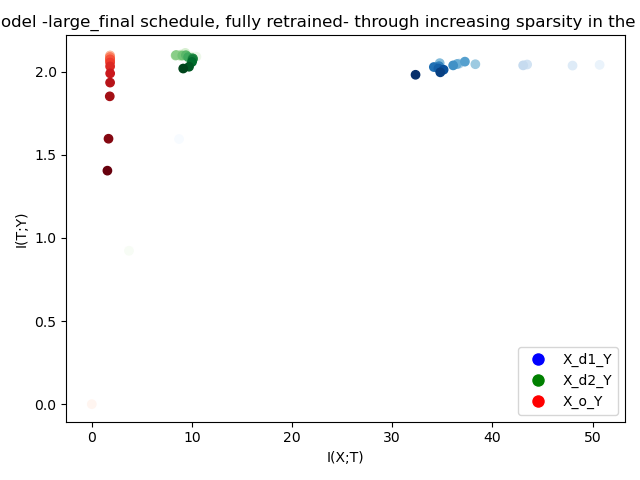

In [24]:
plt.figure()

scatter1 = plt.scatter(MI_estimates[0][:, 0], MI_estimates[0][:, 3], c=custom_ticks, cmap='Blues')
scatter2 = plt.scatter(MI_estimates[0][:, 1], MI_estimates[0][:, 4], c=custom_ticks, cmap='Greens')
scatter3 = plt.scatter(MI_estimates[0][:, 2], MI_estimates[0][:, 5], c=custom_ticks, cmap='Reds')

plt.xlabel('I(X;T)')
plt.ylabel('I(T;Y)')
plt.title('Layers of model -large_final schedule, fully retrained- through increasing sparsity in the information plane')

# Create custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label="X_d1_Y"),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label="X_d2_Y"),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label="X_o_Y")]

# Add legend
plt.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

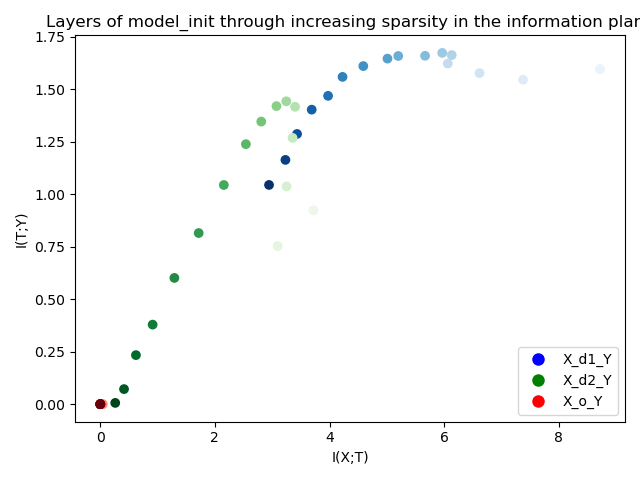

In [25]:
plt.figure()

scatter1 = plt.scatter(MI_estimates_init[0][:, 0], MI_estimates_init[0][:, 3], c=custom_ticks, cmap='Blues')
scatter2 = plt.scatter(MI_estimates_init[0][:, 1], MI_estimates_init[0][:, 4], c=custom_ticks, cmap='Greens')
scatter3 = plt.scatter(MI_estimates_init[0][:, 2], MI_estimates_init[0][:, 5], c=custom_ticks, cmap='Reds')

plt.xlabel('I(X;T)')
plt.ylabel('I(T;Y)')
plt.title('Layers of model_init through increasing sparsity in the information plane')

# Create custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label="X_d1_Y"),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label="X_d2_Y"),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label="X_o_Y")]

# Add legend
plt.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

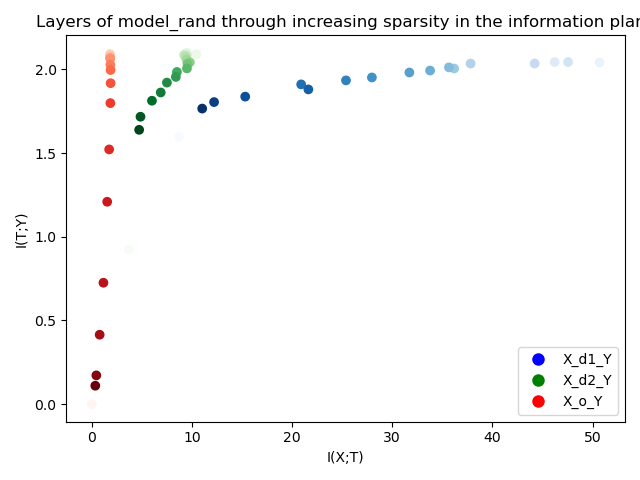

In [26]:
plt.figure()

scatter1 = plt.scatter(MI_estimates_rand[0][:, 0], MI_estimates_rand[0][:, 3], c=custom_ticks, cmap='Blues')
scatter2 = plt.scatter(MI_estimates_rand[0][:, 1], MI_estimates_rand[0][:, 4], c=custom_ticks, cmap='Greens')
scatter3 = plt.scatter(MI_estimates_rand[0][:, 2], MI_estimates_rand[0][:, 5], c=custom_ticks, cmap='Reds')

plt.xlabel('I(X;T)')
plt.ylabel('I(T;Y)')
plt.title('Layers of model_rand through increasing sparsity in the information plane')

# Create custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label="X_d1_Y"),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label="X_d2_Y"),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label="X_o_Y")]

# Add legend
plt.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

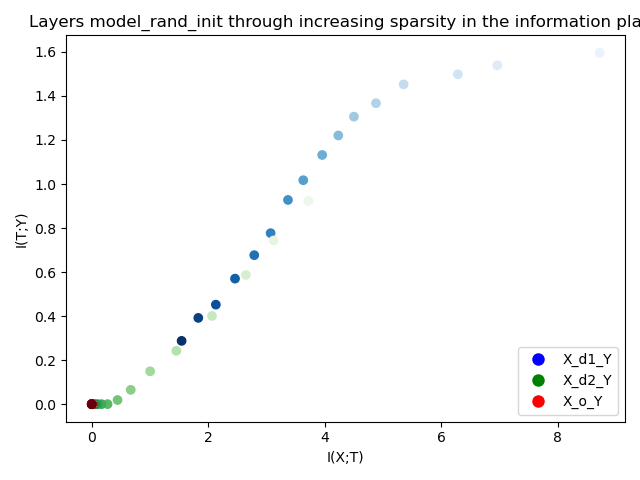

In [27]:
plt.figure()

scatter1 = plt.scatter(MI_estimates_rand_init[0][:, 0], MI_estimates_rand_init[0][:, 3], c=custom_ticks, cmap='Blues')
scatter2 = plt.scatter(MI_estimates_rand_init[0][:, 1], MI_estimates_rand_init[0][:, 4], c=custom_ticks, cmap='Greens')
scatter3 = plt.scatter(MI_estimates_rand_init[0][:, 2], MI_estimates_rand_init[0][:, 5], c=custom_ticks, cmap='Reds')

plt.xlabel('I(X;T)')
plt.ylabel('I(T;Y)')
plt.title('Layers model_rand_init through increasing sparsity in the information plane')

# Create custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label="X_d1_Y"),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label="X_d2_Y"),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label="X_o_Y")]

# Add legend
plt.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

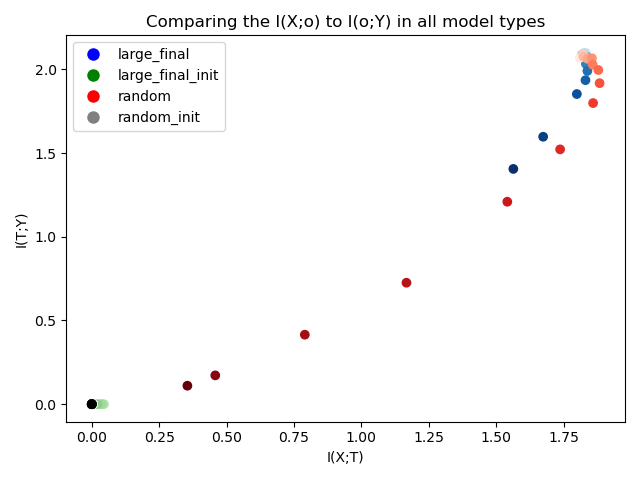

In [28]:
plt.figure()

scatter1 = plt.scatter(MI_estimates[0][:, 2], MI_estimates[0][:, 5], c=custom_ticks, cmap='Blues')
scatter2 = plt.scatter(MI_estimates_init[0][:, 2], MI_estimates_init[0][:, 5], c=custom_ticks, cmap='Greens')
scatter3 = plt.scatter(MI_estimates_rand[0][:, 2], MI_estimates_rand[0][:, 5], c=custom_ticks, cmap='Reds')
scatter4 = plt.scatter(MI_estimates_rand_init[0][:, 2], MI_estimates_rand_init[0][:, 5], c=custom_ticks, cmap='Greys')

plt.xlabel('I(X;T)')
plt.ylabel('I(T;Y)')
plt.title('Comparing the I(X;o) to I(o;Y) in all model types')

# Create custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label="large_final"),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label="large_final_init"),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label="random"),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='grey', markersize=10, label="random_init")]

# Add legend
plt.legend(handles=legend_elements, loc='best')

plt.tight_layout()
plt.show()

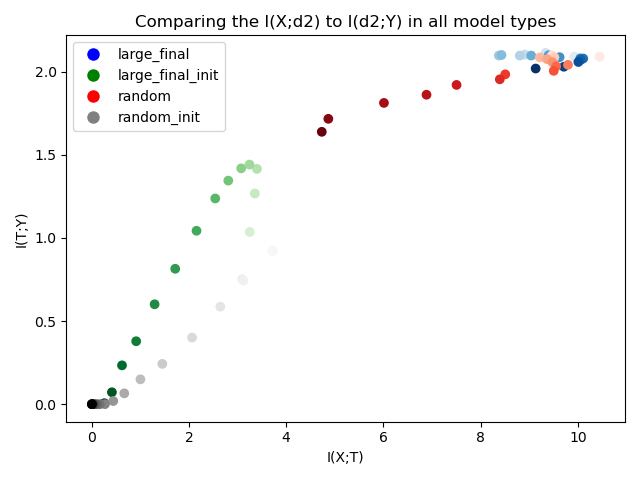

In [29]:
plt.figure()

scatter1 = plt.scatter(MI_estimates[0][:, 1], MI_estimates[0][:, 4], c=custom_ticks, cmap='Blues')
scatter2 = plt.scatter(MI_estimates_init[0][:, 1], MI_estimates_init[0][:, 4], c=custom_ticks, cmap='Greens')
scatter3 = plt.scatter(MI_estimates_rand[0][:, 1], MI_estimates_rand[0][:, 4], c=custom_ticks, cmap='Reds')
scatter4 = plt.scatter(MI_estimates_rand_init[0][:, 1], MI_estimates_rand_init[0][:, 4], c=custom_ticks, cmap='Greys')

plt.xlabel('I(X;T)')
plt.ylabel('I(T;Y)')
plt.title('Comparing the I(X;d2) to I(d2;Y) in all model types')

# Create custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label="large_final"),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label="large_final_init"),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label="random"),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='grey', markersize=10, label="random_init")]

# Add legend
plt.legend(handles=legend_elements, loc='best')

plt.tight_layout()
plt.show()

C:\Users\Alexej\AppData\Local\Temp\ipykernel_13384\3525105860.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


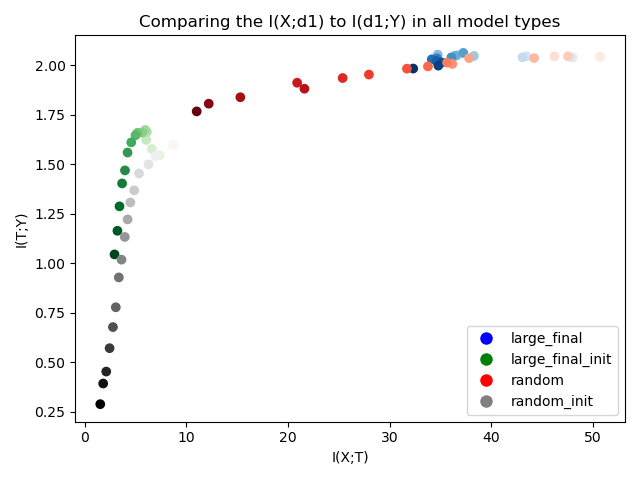

In [30]:
plt.figure()

scatter1 = plt.scatter(MI_estimates[0][:, 0], MI_estimates[0][:, 3], c=custom_ticks, cmap='Blues')
scatter2 = plt.scatter(MI_estimates_init[0][:, 0], MI_estimates_init[0][:, 3], c=custom_ticks, cmap='Greens')
scatter3 = plt.scatter(MI_estimates_rand[0][:, 0], MI_estimates_rand[0][:, 3], c=custom_ticks, cmap='Reds')
scatter4 = plt.scatter(MI_estimates_rand_init[0][:, 0], MI_estimates_rand_init[0][:, 3], c=custom_ticks, cmap='Greys')

plt.xlabel('I(X;T)')
plt.ylabel('I(T;Y)')
plt.title('Comparing the I(X;d1) to I(d1;Y) in all model types')

# Create custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label="large_final"),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label="large_final_init"),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label="random"),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='grey', markersize=10, label="random_init")]

# Add legend
plt.legend(handles=legend_elements, loc='best')

plt.tight_layout()
plt.show()

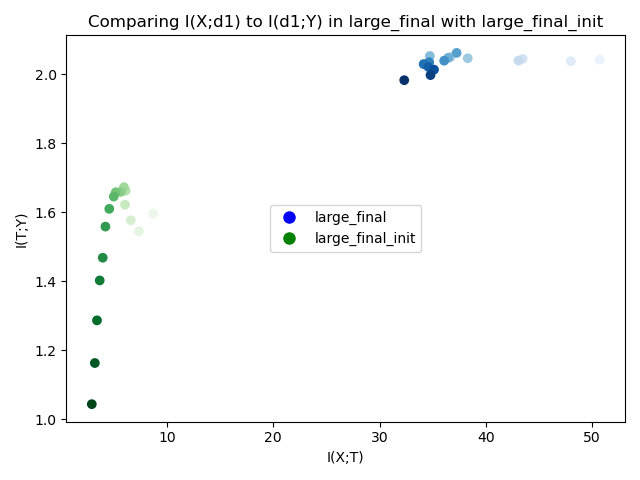

In [31]:
plt.figure()

scatter1 = plt.scatter(MI_estimates[0][:, 0], MI_estimates[0][:, 3], c=custom_ticks, cmap='Blues')
scatter2 = plt.scatter(MI_estimates_init[0][:, 0], MI_estimates_init[0][:, 3], c=custom_ticks, cmap='Greens')

plt.xlabel('I(X;T)')
plt.ylabel('I(T;Y)')
plt.title('Comparing I(X;d1) to I(d1;Y) in large_final with large_final_init')

# Create custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label="large_final"),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label="large_final_init"),
                  ]

# Add legend
plt.legend(handles=legend_elements, loc='center')

plt.tight_layout()
plt.show()

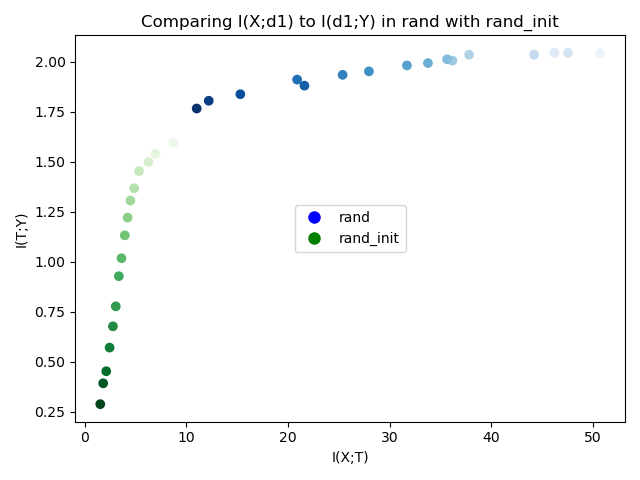

In [32]:
plt.figure()

scatter1 = plt.scatter(MI_estimates_rand[0][:, 0], MI_estimates_rand[0][:, 3], c=custom_ticks, cmap='Blues')
scatter2 = plt.scatter(MI_estimates_rand_init[0][:, 0], MI_estimates_rand_init[0][:, 3], c=custom_ticks, cmap='Greens')

plt.xlabel('I(X;T)')
plt.ylabel('I(T;Y)')
plt.title('Comparing I(X;d1) to I(d1;Y) in rand with rand_init')

# Create custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label="rand"),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label="rand_init"),
                  ]

# Add legend
plt.legend(handles=legend_elements, loc='center')

plt.tight_layout()
plt.show()

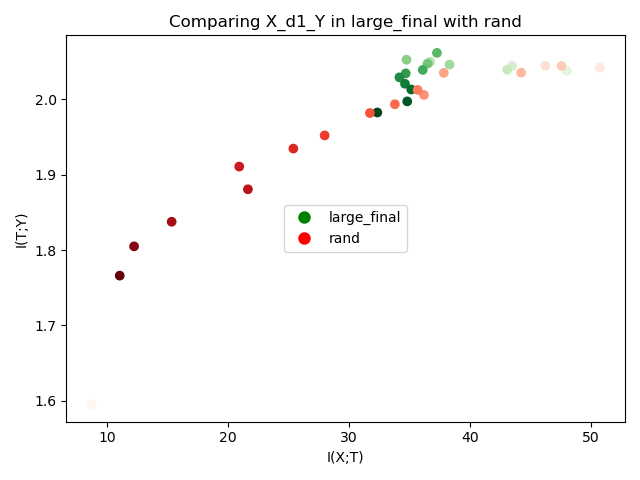

In [33]:
plt.figure()

scatter1 = plt.scatter(MI_estimates[0][:, 0], MI_estimates[0][:, 3], c=custom_ticks, cmap='Greens')
scatter2 = plt.scatter(MI_estimates_rand[0][:, 0], MI_estimates_rand[0][:, 3], c=custom_ticks, cmap='Reds')

plt.xlabel('I(X;T)')
plt.ylabel('I(T;Y)')
plt.title('Comparing X_d1_Y in large_final with rand')

# Create custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label="large_final"),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label="rand"),
                  ]

# Add legend
plt.legend(handles=legend_elements, loc='center')

plt.tight_layout()
plt.show()

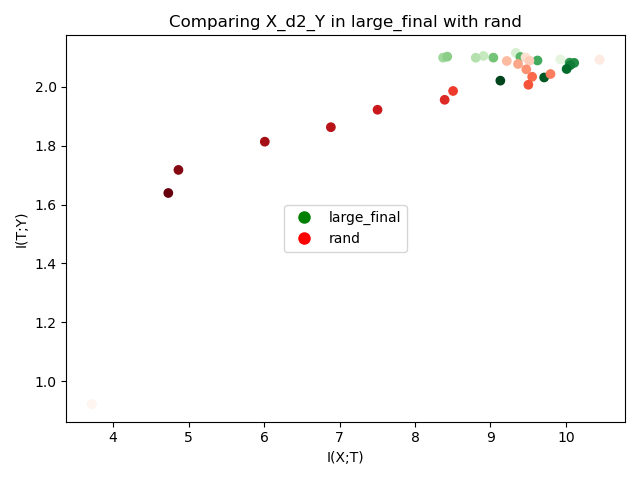

In [34]:
plt.figure()

scatter1 = plt.scatter(MI_estimates[0][:, 1], MI_estimates[0][:, 4], c=custom_ticks, cmap='Greens')
scatter2 = plt.scatter(MI_estimates_rand[0][:, 1], MI_estimates_rand[0][:, 4], c=custom_ticks, cmap='Reds')

plt.xlabel('I(X;T)')
plt.ylabel('I(T;Y)')
plt.title('Comparing X_d2_Y in large_final with rand')

# Create custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label="large_final"),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label="rand"),
                  ]

# Add legend
plt.legend(handles=legend_elements, loc='center')

plt.tight_layout()
plt.show()

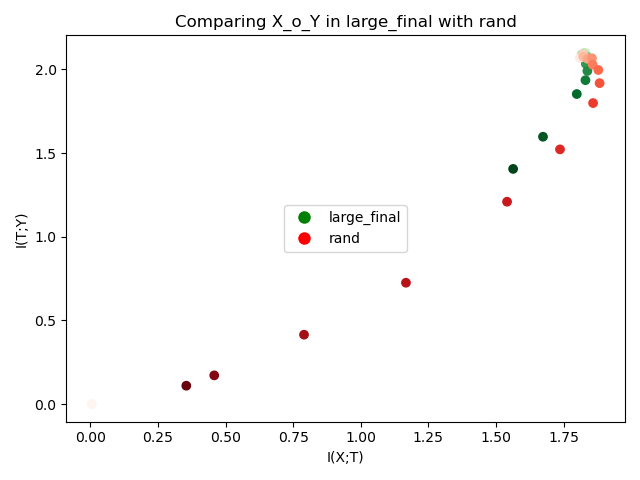

In [35]:
plt.figure()

scatter1 = plt.scatter(MI_estimates[0][:, 2], MI_estimates[0][:, 5], c=custom_ticks, cmap='Greens')
scatter2 = plt.scatter(MI_estimates_rand[0][:, 2], MI_estimates_rand[0][:, 5], c=custom_ticks, cmap='Reds')

plt.xlabel('I(X;T)')
plt.ylabel('I(T;Y)')
plt.title('Comparing X_o_Y in large_final with rand')

# Create custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label="large_final"),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label="rand"),
                  ]

# Add legend
plt.legend(handles=legend_elements, loc='center')

plt.tight_layout()
plt.show()

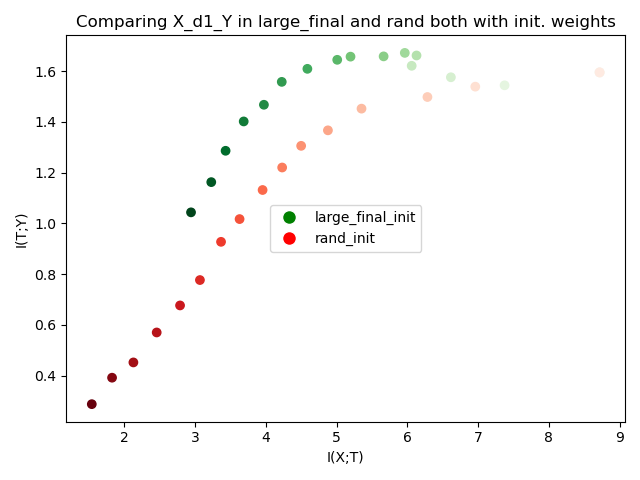

In [36]:
plt.figure()

scatter1 = plt.scatter(MI_estimates_init[0][:, 0], MI_estimates_init[0][:, 3], c=custom_ticks, cmap='Greens')
scatter2 = plt.scatter(MI_estimates_rand_init[0][:, 0], MI_estimates_rand_init[0][:, 3], c=custom_ticks, cmap='Reds')

plt.xlabel('I(X;T)')
plt.ylabel('I(T;Y)')
plt.title('Comparing X_d1_Y in large_final and rand both with init. weights')

# Create custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label="large_final_init"),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label="rand_init"),
                  ]

# Add legend
plt.legend(handles=legend_elements, loc='center')

plt.tight_layout()
plt.show()

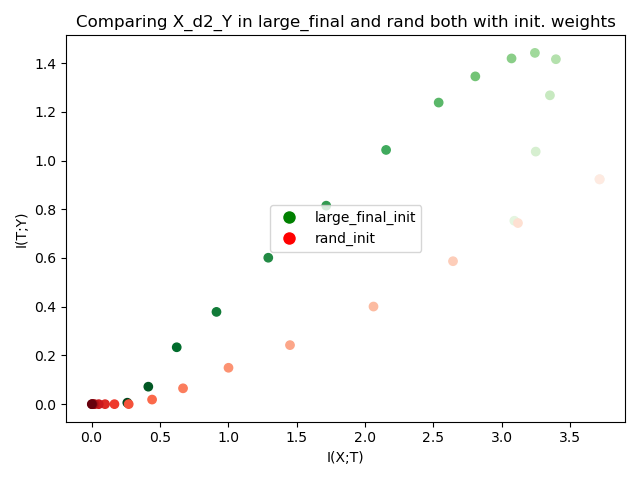

In [37]:
plt.figure()

scatter1 = plt.scatter(MI_estimates_init[0][:, 1], MI_estimates_init[0][:, 4], c=custom_ticks, cmap='Greens')
scatter2 = plt.scatter(MI_estimates_rand_init[0][:, 1], MI_estimates_rand_init[0][:, 4], c=custom_ticks, cmap='Reds')

plt.xlabel('I(X;T)')
plt.ylabel('I(T;Y)')
plt.title('Comparing X_d2_Y in large_final and rand both with init. weights')

# Create custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label="large_final_init"),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label="rand_init"),
                  ]

# Add legend
plt.legend(handles=legend_elements, loc='center')

plt.tight_layout()
plt.show()

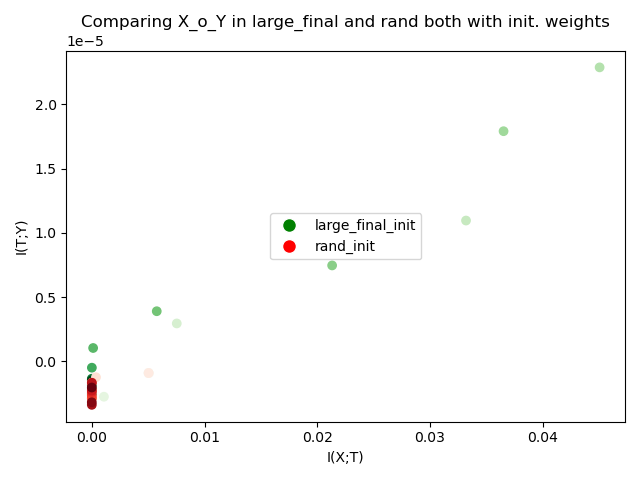

In [38]:
plt.figure()

scatter1 = plt.scatter(MI_estimates_init[0][:, 2], MI_estimates_init[0][:, 5], c=custom_ticks, cmap='Greens')
scatter2 = plt.scatter(MI_estimates_rand_init[0][:, 2], MI_estimates_rand_init[0][:, 5], c=custom_ticks, cmap='Reds')

plt.xlabel('I(X;T)')
plt.ylabel('I(T;Y)')
plt.title('Comparing X_o_Y in large_final and rand both with init. weights')

# Create custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label="large_final_init"),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label="rand_init"),
                  ]

# Add legend
plt.legend(handles=legend_elements, loc='center')

plt.tight_layout()
plt.show()

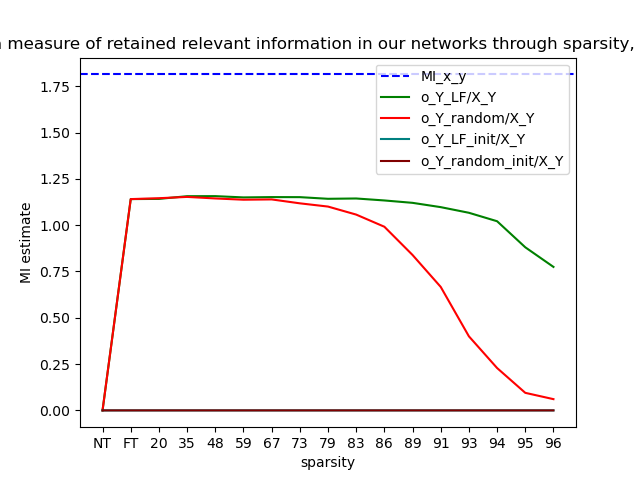

In [39]:
plt.figure()
plt.axhline(y=MI_x_y[0], color='blue', linestyle='--', label='MI_x_y')
plt.plot(MI_estimates[0][:, 5]/MI_x_y[0], color="g", label="o_Y_LF/X_Y")
plt.plot(MI_estimates_rand[0][:, 5]/MI_x_y[0], color="r", label="o_Y_random/X_Y")
plt.plot(MI_estimates_init[0][:, 5]/MI_x_y[0], color="teal", label="o_Y_LF_init/X_Y")
plt.plot(MI_estimates_rand_init[0][:, 5]/MI_x_y[0], color="maroon", label="o_Y_random_init/X_Y")
plt.legend()
plt.xticks(custom_ticks,custom_labels)
plt.xlabel('sparsity')
plt.ylabel('MI estimate')
plt.title(f'I(Y;o)/I(X;Y) as a measure of retained relevant information in our networks through sparsity, average of {averaging_iterations} runs')

# Display the plot
plt.show()

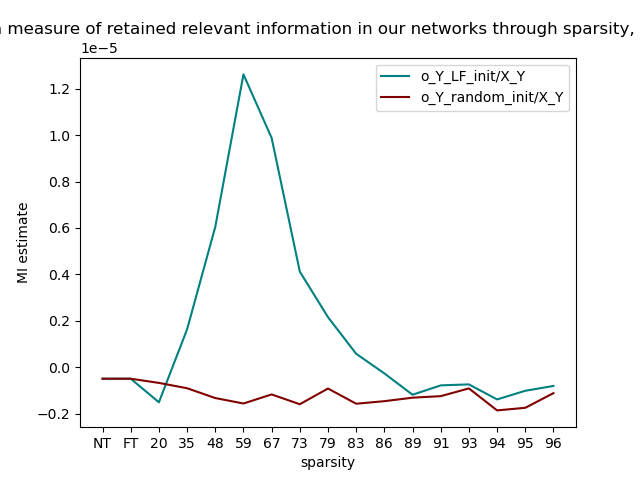

In [40]:
plt.figure()
plt.plot(MI_estimates_init[0][:, 5]/MI_x_y[0], color="teal", label="o_Y_LF_init/X_Y")
plt.plot(MI_estimates_rand_init[0][:, 5]/MI_x_y[0], color="maroon", label="o_Y_random_init/X_Y")
plt.legend()
plt.xticks(custom_ticks,custom_labels)
plt.xlabel('sparsity')
plt.ylabel('MI estimate')
plt.title(f'I(Y;o)/I(X;Y) as a measure of retained relevant information in our networks through sparsity, average of {averaging_iterations} runs')

# Display the plot
plt.show()